# eICU Collaborative Research Database

# Notebook 1: Exploring the `patient` table

The aim of this notebook is to introduce the `patient` table, a key table in the eICU Collaborative Research Database. 

The `patient` table contains patient demographics and admission and discharge details for hospital and ICU stays. For more detail, see: http://eicu-crd.mit.edu/eicutables/patient/

Before starting, you will need to copy the eicu demo database file ('eicu_demo.sqlite3') to the `data` directory.

Documentation on the eICU Collaborative Research Database can be found at: http://eicu-crd.mit.edu/. 

## 1. Getting set up

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import os
import sqlite3

In [2]:
# Plot settings
%matplotlib inline
plt.style.use('ggplot')
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})

In [3]:
# Connect to the database - which is assumed to be in the current directory
# fn = 'eicu_demo.sqlite3'
fn = '/Users/meisun/Documents/study/thesis/prepare/datatset/EICU/eicu_v2_0_1.sqlite3'
con = sqlite3.connect(fn)
cur = con.cursor()

## 2. Display list of tables

In [4]:
query = \
"""
SELECT type, name
FROM sqlite_master 
WHERE type='table'
ORDER BY name;
"""

list_of_tables = pd.read_sql_query(query,con)

In [5]:
list_of_tables

,type,name
0,table,admissiondrug
1,table,admissiondx
2,table,allergy
3,table,apacheapsvar
4,table,apachepatientresult
5,table,apachepredvar
6,table,careplancareprovider
7,table,careplaneol
8,table,careplangeneral
9,table,careplangoal


## 3. Reviewing the patient table

In [6]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM patient
"""

print(query)


SELECT *
FROM patient



In [7]:
# run the query and assign the output to a variable
patient_tab = pd.read_sql_query(query,con)

In [8]:
# display the first few rows of the dataframe
patient_tab.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141764,129391,Female,87,Caucasian,59,91,,157.5,23:36:00,...,ICU to SDU,2,stepdown/other,,,18:58:00,344,Home,Alive,002-1039
1,141765,129391,Female,87,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,...,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039
2,143870,131022,Male,76,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,...,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289
3,144815,131736,Female,34,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,...,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116
4,145427,132209,Male,61,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,...,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243


In [9]:
# list all of the columns in the table
patient_tab.columns

Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

### Questions

- What does `patientunitstayid` represent? (hint, see: http://eicu-crd.mit.edu/eicutables/patient/)
- What does `patienthealthsystemstayid` represent?
- What does `uniquepid` represent?

In [10]:
# select a limited number of columns to view
columns = ['uniquepid', 'patientunitstayid','gender','age','unitdischargestatus']
patient_tab[columns].head()

,uniquepid,patientunitstayid,gender,age,unitdischargestatus
0,002-1039,141764,Female,87,Alive
1,002-1039,141765,Female,87,Alive
2,002-12289,143870,Male,76,Alive
3,002-1116,144815,Female,34,Alive
4,002-12243,145427,Male,61,Alive


In [11]:
# what are the unique values for age?
age_col = 'age'
patient_tab[age_col].sort_values().unique()

array(['', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '> 89'],
      dtype=object)

### Questions

- Try plotting a histogram of ages using the commands in the cell below. Why does the plot fail?

```python
# try plotting a histogram of ages
figsize = (18,8)
patient_tab[age_col].plot(kind='hist',
                          figsize=figsize, 
                          fontsize=fontsize,
                          bins=15)
```

In [12]:
# create a column containing numerical ages
# If ‘coerce’, then invalid parsing will be set as NaN
agenum_col = 'age_num'
patient_tab[agenum_col] = pd.to_numeric(patient_tab[age_col], errors='coerce')
patient_tab[agenum_col].sort_values().unique()

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
       80., 81., 82., 83., 84., 85., 86., 87., 88., 89., nan])

<Axes: ylabel='Frequency'>

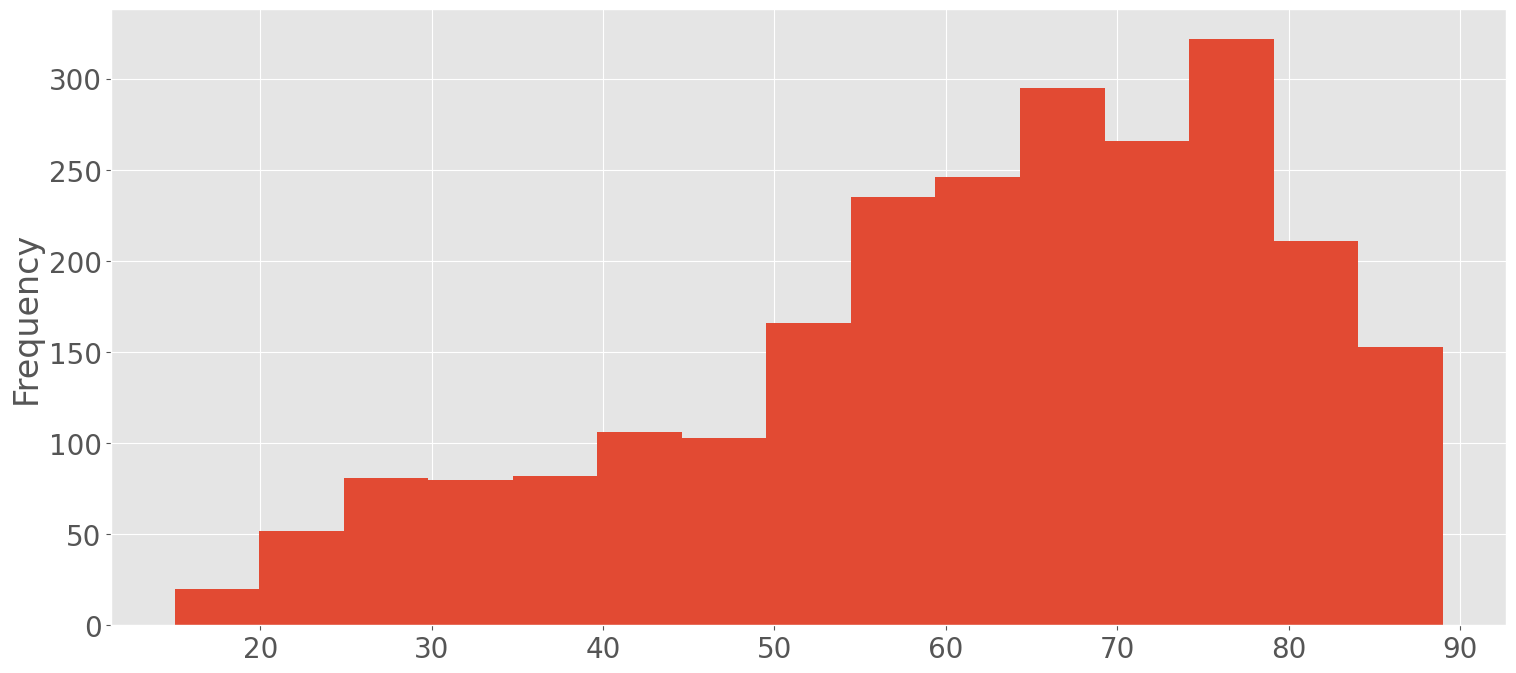

In [13]:
# try plotting a histogram of ages
figsize = (18,8)
patient_tab[agenum_col].plot(kind='hist',
                             figsize=figsize, 
                             fontsize=fontsize,
                             bins=15)

### Questions

- Use the `mean()` method to find the mean age (hint: `patient_tab[agenum_col].mean()`). What is the mean? Why might we expect this to be lower than the true mean?
- In the same way that you use `.mean()`, you can use `.describe()`. Use the `describe()` method to explore the `admissionweight` of patients in kg. What issue do you see? What are some methods that you could use to deal with this issue?

In [15]:
# set threshold based on 99th quantile
adweight_col = 'admissionweight'

patient_tab[adweight_col] = pd.to_numeric(patient_tab[adweight_col], errors='coerce')
patient_tab[adweight_col].sort_values().unique()

quant = patient_tab[adweight_col].quantile(0.99)
patient_tab[patient_tab[adweight_col] > quant] = None

In [16]:
# describe the admission weights
patient_tab[adweight_col].describe()

count    2298.000000
mean       81.919752
std        23.000539
min         0.500000
25%        65.447500
50%        78.900000
75%        95.700000
max       160.000000
Name: admissionweight, dtype: float64

### Questions

- What is the average change in weight between `admissionweight` and `dischargeweight`?
- Plot a distribution of the weight change

In [18]:
# set threshold based on 99th quantile
disweight_col = 'dischargeweight'
patient_tab[disweight_col] = pd.to_numeric(patient_tab[disweight_col], errors='coerce')
patient_tab[disweight_col].sort_values().unique()

quant = patient_tab[disweight_col].quantile(0.99)
patient_tab[patient_tab[disweight_col] > quant] = None

In [19]:
# describe the discharge weights
patient_tab[disweight_col].describe()

count    1210.000000
mean       81.169471
std        23.156414
min        22.300000
25%        64.000000
50%        79.060000
75%        96.867500
max       151.900000
Name: dischargeweight, dtype: float64

In [20]:
patient_tab['weight_change'] = patient_tab[adweight_col] - patient_tab[disweight_col]

<Axes: ylabel='Frequency'>

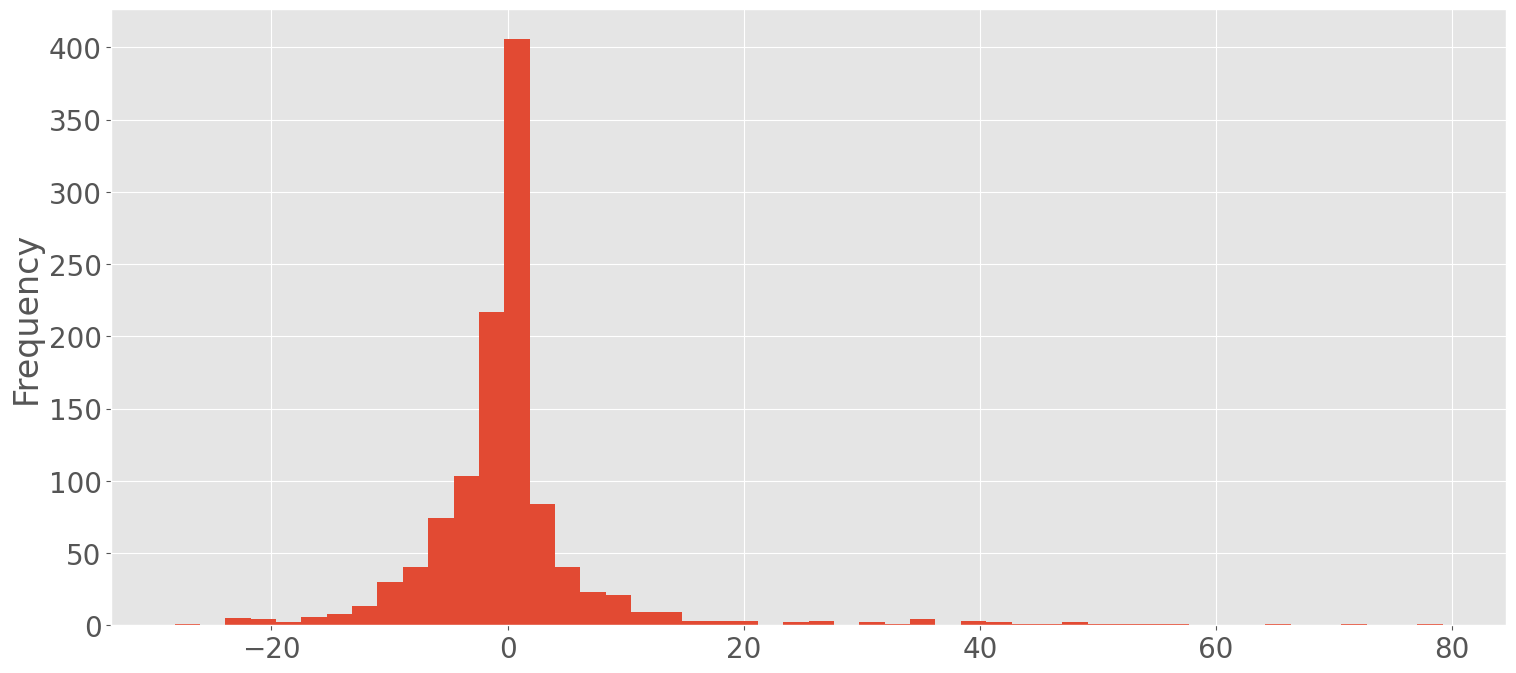

In [21]:
# plot the weight changes
figsize = (18,8)
patient_tab['weight_change'].plot(kind='hist',
                             figsize=figsize, 
                             fontsize=fontsize,
                             bins=50)